# Análise Consumo de Álcool

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Read table 1
### df -> Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)

In [2]:
df = pd.read_csv("data/alcohol.csv")
df.head()

,Unnamed: 0,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).1","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).2","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).3","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).4","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).5","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).6","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).7","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).8",...,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).50","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).51","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).52","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).53","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).54","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).55","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).56","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).57","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).58","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2).59"
0,NaN,2019,2019,2019,2018,2018,2018,2017,2017,2017,...,2003,2002,2002,2002,2001,2001,2001,2000,2000,2000
1,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
2,Afghanistan,0.0 [0.0-0.1],0.0 [0.0-0.1],0,0.0 [0.0-0.1],0.0 [0.0-0.1],0,0.0 [0.0-0.1],0.0 [0.0-0.1],0,...,0,0.0 [0.0-0.1],0.1 [0.0-0.2],0,0.0 [0.0-0.1],0.1 [0.0-0.2],0,0.0 [0.0-0.1],0.1 [0.0-0.2],0
3,Albania,6.8 [5.5-8.1],11.0 [9.1-13.5],2.5 [1.7-2.6],6.8 [5.5-8.1],11.0 [9.1-13.5],2.5 [1.7-2.6],6.7 [5.4-7.9],10.8 [8.9-13.2],2.5 [1.7-2.6],...,2.7 [1.9-2.9],7.5 [6.0-9.1],12.1 [10.0-15.3],2.9 [2.0-3.0],7.5 [5.9-9.2],12.1 [9.8-15.3],2.9 [2.0-3.0],7.5 [5.9-9.2],12.1 [9.8-15.3],2.9 [2.0-3.0]
4,Algeria,0.6 [0.5-0.8],1.1 [0.9-1.4],0.2 [0.1-0.2],0.6 [0.5-0.8],1.1 [0.9-1.4],0.2 [0.1-0.2],0.6 [0.5-0.8],1.1 [0.9-1.4],0.2 [0.1-0.2],...,0.1 [0.1-0.2],0.3 [0.3-0.5],0.6 [0.5-0.8],0.1 [0.1-0.1],0.3 [0.3-0.4],0.5 [0.4-0.7],0.1 [0.1-0.1],0.3 [0.3-0.4],0.5 [0.4-0.7],0.1 [0.1-0.1]


In [3]:
t = df.columns
for i in range(1, 61):
    df.rename(columns={t[i] : df.iloc[1,i] + "-" + df.iloc[0,i]}, inplace=True)
df.rename(columns={t[0] : "Country"}, inplace=True)
df.drop([0,1], axis=0, inplace=True)
df = df.reset_index()
df = df.iloc[:, 1:]
df.head()

,Country,Both sexes-2019,Male-2019,Female-2019,Both sexes-2018,Male-2018,Female-2018,Both sexes-2017,Male-2017,Female-2017,...,Female-2003,Both sexes-2002,Male-2002,Female-2002,Both sexes-2001,Male-2001,Female-2001,Both sexes-2000,Male-2000,Female-2000
0,Afghanistan,0.0 [0.0-0.1],0.0 [0.0-0.1],0,0.0 [0.0-0.1],0.0 [0.0-0.1],0,0.0 [0.0-0.1],0.0 [0.0-0.1],0,...,0,0.0 [0.0-0.1],0.1 [0.0-0.2],0,0.0 [0.0-0.1],0.1 [0.0-0.2],0,0.0 [0.0-0.1],0.1 [0.0-0.2],0
1,Albania,6.8 [5.5-8.1],11.0 [9.1-13.5],2.5 [1.7-2.6],6.8 [5.5-8.1],11.0 [9.1-13.5],2.5 [1.7-2.6],6.7 [5.4-7.9],10.8 [8.9-13.2],2.5 [1.7-2.6],...,2.7 [1.9-2.9],7.5 [6.0-9.1],12.1 [10.0-15.3],2.9 [2.0-3.0],7.5 [5.9-9.2],12.1 [9.8-15.3],2.9 [2.0-3.0],7.5 [5.9-9.2],12.1 [9.8-15.3],2.9 [2.0-3.0]
2,Algeria,0.6 [0.5-0.8],1.1 [0.9-1.4],0.2 [0.1-0.2],0.6 [0.5-0.8],1.1 [0.9-1.4],0.2 [0.1-0.2],0.6 [0.5-0.8],1.1 [0.9-1.4],0.2 [0.1-0.2],...,0.1 [0.1-0.2],0.3 [0.3-0.5],0.6 [0.5-0.8],0.1 [0.1-0.1],0.3 [0.3-0.4],0.5 [0.4-0.7],0.1 [0.1-0.1],0.3 [0.3-0.4],0.5 [0.4-0.7],0.1 [0.1-0.1]
3,Andorra,12.3 [10.2-14.1],18.6 [15.4-21.2],5.7 [4.8-6.6],12.3 [10.2-14.1],18.6 [15.4-21.2],5.7 [4.8-6.6],12.3 [10.3-14.1],18.7 [15.4-21.2],5.8 [4.8-6.6],...,6.2 [5.1-6.9],13.2 [11.1-14.9],19.4 [16.1-21.6],6.3 [5.2-7.1],13.4 [11.2-15.2],19.8 [16.2-22.1],6.4 [5.3-7.2],13.4 [11.2-15.2],19.8 [16.2-22.1],6.4 [5.3-7.2]
4,Angola,7.8 [6.5-9.3],12.4 [10.4-14.9],3.5 [2.9-4.2],7.8 [6.5-9.3],12.4 [10.4-14.9],3.5 [2.9-4.2],7.9 [6.6-9.3],12.5 [10.6-14.9],3.5 [2.9-4.2],...,1.5 [1.1-2.0],3.6 [2.6-4.5],5.6 [4.1-7.2],1.5 [1.1-1.9],3.3 [2.4-4.4],5.3 [3.9-6.9],1.4 [1.0-1.9],3.3 [2.4-4.4],5.3 [3.9-6.9],1.4 [1.0-1.9]


## Clean rows

In [4]:
#df.isnull().sum().sum()
df=df.dropna().reset_index(drop=True)

In [5]:
def remove_tags(line):
    resp = ""
    i = 0
    while i < len(line):
        if line[i] == '[':
            i += 1
            while line[i] != ']': i += 1
        else:
            resp += line[i]
        i += 1
    return resp

'''for j in df["Both sexes - 2019"]:
    #print(j)
    df["Both sexes - 2019"].replace(j, remove_tags(j), inplace=True)
    
for j in df["Male - 2019"]:
    #print(j)
    df["Male - 2019"].replace(j, remove_tags(j), inplace=True)
    
for j in df["Female - 2019"]:
    #print(j)
    df["Female - 2019"].replace(j, remove_tags(j), inplace=True)'''
    
for i in range(1, 61):
    for j in df.iloc[:,i]:
        df.iloc[:,i].replace(j, remove_tags(j).strip(), inplace=True)

In [6]:
df.head()

,Country,Both sexes-2019,Male-2019,Female-2019,Both sexes-2018,Male-2018,Female-2018,Both sexes-2017,Male-2017,Female-2017,...,Female-2003,Both sexes-2002,Male-2002,Female-2002,Both sexes-2001,Male-2001,Female-2001,Both sexes-2000,Male-2000,Female-2000
0,Afghanistan,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.1,0,0.0,0.1,0,0.0,0.1,0
1,Albania,6.8,11.0,2.5,6.8,11.0,2.5,6.7,10.8,2.5,...,2.7,7.5,12.1,2.9,7.5,12.1,2.9,7.5,12.1,2.9
2,Algeria,0.6,1.1,0.2,0.6,1.1,0.2,0.6,1.1,0.2,...,0.1,0.3,0.6,0.1,0.3,0.5,0.1,0.3,0.5,0.1
3,Andorra,12.3,18.6,5.7,12.3,18.6,5.7,12.3,18.7,5.8,...,6.2,13.2,19.4,6.3,13.4,19.8,6.4,13.4,19.8,6.4
4,Angola,7.8,12.4,3.5,7.8,12.4,3.5,7.9,12.5,3.5,...,1.5,3.6,5.6,1.5,3.3,5.3,1.4,3.3,5.3,1.4


In [7]:
df.dtypes

Country            object
Both sexes-2019    object
Male-2019          object
Female-2019        object
Both sexes-2018    object
                    ...  
Male-2001          object
Female-2001        object
Both sexes-2000    object
Male-2000          object
Female-2000        object
Length: 61, dtype: object

In [8]:
df.loc[df['Country'] == "Brazil"]

,Country,Both sexes-2019,Male-2019,Female-2019,Both sexes-2018,Male-2018,Female-2018,Both sexes-2017,Male-2017,Female-2017,...,Female-2003,Both sexes-2002,Male-2002,Female-2002,Both sexes-2001,Male-2001,Female-2001,Both sexes-2000,Male-2000,Female-2000
23,Brazil,7.3,11.7,3.2,7.3,11.7,3.2,7.4,11.8,3.3,...,3.7,8.7,13.8,3.8,8.9,14.2,3.9,8.9,14.2,3.9


In [9]:
#df2[:,1:].astype('float')
df.iloc[:,1:].astype('float').dtypes

Both sexes-2019    float64
Male-2019          float64
Female-2019        float64
Both sexes-2018    float64
Male-2018          float64
Female-2018        float64
Both sexes-2017    float64
Male-2017          float64
Female-2017        float64
Both sexes-2016    float64
Male-2016          float64
Female-2016        float64
Both sexes-2015    float64
Male-2015          float64
Female-2015        float64
Both sexes-2014    float64
Male-2014          float64
Female-2014        float64
Both sexes-2013    float64
Male-2013          float64
Female-2013        float64
Both sexes-2012    float64
Male-2012          float64
Female-2012        float64
Both sexes-2011    float64
Male-2011          float64
Female-2011        float64
Both sexes-2010    float64
Male-2010          float64
Female-2010        float64
Both sexes-2009    float64
Male-2009          float64
Female-2009        float64
Both sexes-2008    float64
Male-2008          float64
Female-2008        float64
Both sexes-2007    float64
M

In [10]:
years = []
for i in range (2000,2020):
    years.append(i)

In [11]:
bs = []; m = []; f = []
for i in range (1, 61, 3):
    bs.append(df.iloc[23,i])
for i in range (2, 61, 3):
    m.append(df.iloc[23,i])
for i in range (3, 61, 3):
    f.append(df.iloc[23,i])

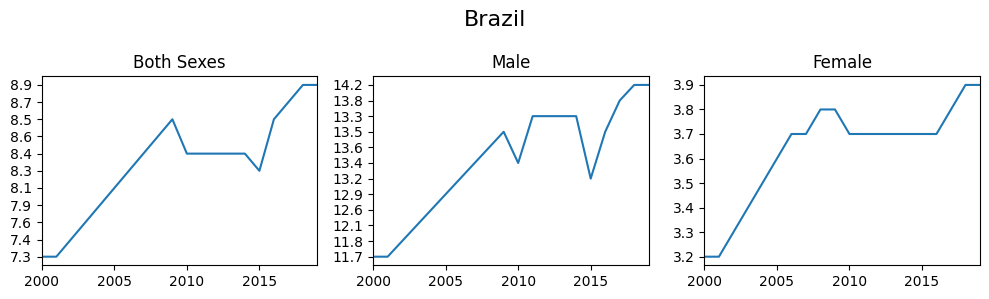

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))

ax[0].plot(years, bs)
ax[0].set_title('Both Sexes')
ax[0].set_xlim(2000, 2019)
#ax[0].set_ylim(0.0, 15.0)

ax[1].plot(years, m)
ax[1].set_title('Male')
ax[1].set_xlim(2000, 2019)
#ax[1].set_ylim(0.0, 15.0)

ax[2].plot(years, f)
ax[2].set_title('Female')
ax[2].set_xlim(2000, 2019)
#ax[2].set_ylim(0.0, 15.0)

fig.suptitle('Brazil', fontsize=16)
plt.tight_layout()
plt.show()

## Read table 2
### df1 -> Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

In [13]:
df1 = pd.read_csv("data/consumption.csv")
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).1","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).2","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).3","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).4","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).5","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).6","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).7","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).8","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).9"
0,Country,Data Source,Beverage Types,2019.00,2018.00,2017.00,2016.00,2015.0,2014.00,2013.00,2012.00,2011.00,2010.00
1,Afghanistan,Data source,Wine,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Data source,Beer,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01
3,Afghanistan,Data source,Spirits,0.01,0.01,0.01,0.01,0.0,0.01,0.00,0.00,0.00,0.00
4,Afghanistan,Data source,All types,0.01,0.01,0.01,0.01,0.0,0.01,0.01,0.01,0.01,0.02


## Drop and rename columns

In [14]:
df1 = df1.iloc[:, 0:4]
#df1.head()
df1.rename(columns={"Unnamed: 0" : "Country"}, inplace=True)
df1.rename(columns={"Unnamed: 2" : "Beverage Types"}, inplace=True)
df1.rename(columns={"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)" : "Consumption (in litres of pure alcohol) - 2019"}, inplace=True)
df1.drop([0], axis=0, inplace=True)
del df1["Unnamed: 1"]
df1 = df1.reset_index()
df1 = df1.iloc[:, 1:5]
df1.head()
#df1.describe

,Country,Beverage Types,Consumption (in litres of pure alcohol) - 2019
0,Afghanistan,Wine,0.00
1,Afghanistan,Beer,0.00
2,Afghanistan,Spirits,0.01
3,Afghanistan,All types,0.01
4,Afghanistan,Other alcoholic beverages,0.00


## Read table 3
### df2 -> 	Nominal food and alcohol expenditures, without taxes and tips, for all purchasers

In [15]:
df2 = pd.read_excel("data/nominal_expenditures_no_taxes_tips.xlsx")
df2.head()

,"Nominal food and alcohol expenditures, without taxes and tips, for all purchasers",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,(Millions of dollars),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Food at home (FAH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Alcohol at home (AAH),NaN,NaN,NaN,Alcohol away from home (AAFH),NaN,NaN,NaN
2,NaN,Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Sales,NaN,NaN,NaN,Sales,NaN,NaN,NaN
3,Year,Grocery stores,Convenience stores,Other food stores,Warehouse clubs and supercenters,Mass merchandisers,Other stores and foodservice,Mail order and home delivery,"Direct selling by farmers, manufacturers, and ...",Home production and donations,...,Food furnished and donated,Total FAFH,Liquor stores,Food stores,"Other AAH sales, NEC",Total AAH,Eating and drinking places,Hotels and motels,"Other AAFH, NEC",Total AAFH
4,1997,265244.21875,9559.268555,10485.013672,24486.003906,8345.249023,35529.546875,11478.321289,4030.202148,1127.423096,...,22909.521484,303700.625,19778.160156,12794.12207,15293.774414,47866.054688,27304.248047,3449.508057,3833.735352,34587.492188


## Drop and rename column

In [16]:
df2 = df2.iloc[:, [0, 21, 22, 23, 24, 25, 26, 27, 28]]
df2.rename(columns={"Nominal food and alcohol expenditures, without taxes and tips, for all purchasers" : "Year"}, inplace=True)
df2.rename(columns={"Unnamed: 21" : "Liquor Stores"}, inplace=True)
df2.rename(columns={"Unnamed: 22" : "Food Stores"}, inplace=True)
df2.rename(columns={"Unnamed: 23" : "Other AAH Sales"}, inplace=True)
df2.rename(columns={"Unnamed: 24" : "Total AAH"}, inplace=True)
df2.rename(columns={"Unnamed: 25" : "Eating and Drinking Places"}, inplace=True)
df2.rename(columns={"Unnamed: 26" : "Hotels and Motels"}, inplace=True)
df2.rename(columns={"Unnamed: 27" : "Other AAFH"}, inplace=True)
df2.rename(columns={"Unnamed: 28" : "Total AAFH"}, inplace=True)
df2.drop([0, 1, 2, 3], axis=0, inplace=True)
df2 = df2.loc[(df2["Year"] == 2019)]
df2 = df2.reset_index()
df2 = df2.iloc[:, 1:]
df2.head()
#df2["Nominal food and alcohol expenditures, without taxes and tips, for all purchasers"]

,Year,Liquor Stores,Food Stores,Other AAH Sales,Total AAH,Eating and Drinking Places,Hotels and Motels,Other AAFH,Total AAFH
0,2019,48703.496094,29715.265625,26959.990234,105378.75,79285.414062,9396.847656,9764.667969,98446.929688


# Análise

## Quem bebeu mais em 2019, homens ou mulheres?

In [17]:
sum_male = math.ceil(pd.to_numeric(df["Male-2019"], errors='coerce').sum())
sum_female = math.ceil(pd.to_numeric(df["Female-2019"], errors='coerce').sum())
print(str(sum_male) + "\t" + str(sum_female))

1712	463
